In [1]:
%pylab inline
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
import sys

Populating the interactive namespace from numpy and matplotlib


In [2]:
#importing my functions in an organized manner
sys.path.insert(0, '/Users/jamiesullivan/Desktop/FDM/prj_FDM')
from Kernels import *
from Laplacians import *
from Cuts import *
from Smoothing import *
from Densities import *
from Gradients import *
from QPressure import *

Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib
Populating the interactive namespace from numpy and matplotlib


/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['linalg', 'power', 'norm', 'fft', 'random', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:161: UserWarning: pylab import has clobbered these variables: ['linalg', 'power', 'fft', 'random', 'info']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [3]:
#main
#specify DM type
dmType='cdm'
#options are 'cdm', 'fdm21', 'fdm22'

#specify kernel via index
kernelChoice='cubic_bspline'

kernelList = [[cubic_bspline,del_cubic_bspline,lap_cubic_bspline,parth_cubic_bspline], #cubic bspline ->0
              [gaussian,del_gaussian,lap_gaussian,parth_gaussian], #gaussian ->1
              [quartic_bspline,del_quartic_bspline,lap_quartic_bspline,parth_quartic_bspline], #quartic bspline ->2
              [quintic_bspline,del_quintic_bspline,lap_quartic_bspline,parth_quartic_bspline], #quintic bspline ->3
              [poly6,del_poly6,lap_poly6,parth_poly6], #poly6 bspline ->4
              [wend_C2,del_wend_C2,lap_wend_C2,parth_wend_C2], #wendland C2 ->5
              [wend_C4,del_wend_C4,lap_wend_C4,parth_wend_C4], #wendland C4 ->6
              [wend_C6,del_wend_C6,lap_wend_C6,parth_wend_C6]] #wendland C6 ->7

kernelIndex ={'cubic_bspline':0,'gaussian':1,'quartic_bspline':2,'quintic_bspline':3,'poly6':4,\
              'wend_C2':5,'wend_C4':6,'wend_C6':7}

kernel = kernelList[kernelIndex.get(kernelChoice)][0]
del_kernel = kernelList[kernelIndex.get(kernelChoice)][1]
delsq_kernel = kernelList[kernelIndex.get(kernelChoice)][2]
parth_kernel = kernelList[kernelIndex.get(kernelChoice)][3]
#options are cubic_bspline, gaussian, quartic_bspline, quintic_bspline, poly6, wend_C2, wend_C4, wend_C6
print(kernelChoice)


#specify laplacian

#options are naiveLaplace, brookLaplace, nbLaplace


cubic_bspline


In [4]:
#import data
#specify sim run
dataDM = np.loadtxt(dmType+'_dm.txt',skiprows=1)

In [5]:
#cut function call
cutDataMin,radMin,rMinSearch,cutDataMax,radMax,rMaxSearch = Cuts(dataDM)

In [6]:
#smoothing function call
hMin,hMax = Smoothing(cutDataMin,cutDataMax,rMinSearch,rMaxSearch)

In [7]:
#density function call
rhoMin,rhoMax = Densities(kernel, cutDataMin, hMin, cutDataMax, hMax)

In [8]:
#density gradient and laplacian function call
del_rhoMin, delsq_rhoMin, del_rhoMax, delsq_rhoMax = Gradients(del_kernel,delsq_kernel,cutDataMin,rhoMin,\
                                                             cutDataMax,rhoMax,hMin,hMax)

In [9]:
#QP function call
Q_rhoMin,accelQ_rhoMin,Q_rhoMax,accelQ_rhoMax  = QPressure(del_kernel,parth_kernel,rhoMin,rhoMax,\
                                                 del_rhoMin,del_rhoMax,delsq_rhoMin,delsq_rhoMax,\
                                                 hMin,hMax,cutDataMin,cutDataMax)#*(1e12)*(1/.67**2) #conversion factor

In [10]:
#save relevant info (QP, densities, etc.) to numpy, file 
print(np.median(Q_rhoMin*(1e12)*(1/.67**2)))

-2.92146801182e-09


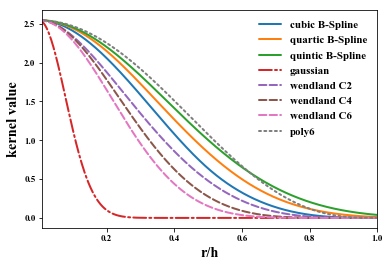

In [11]:
#kernel plots
rspace=np.linspace(0,2,1000)
plt.figure()
plt.xlabel(r'r/h',size='x-large')
plt.ylabel(r'kernel value',size='x-large')
plt.xlim(0.01,1)

Vcubic_bspline=[]
for r in rspace: Vcubic_bspline.append(cubic_bspline([0,0,0],[r,0,0],1))
plt.plot(rspace,Vcubic_bspline,ls='-',label='cubic B-Spline')

Vquartic_bspline=[]
for r in rspace: Vquartic_bspline.append(quartic_bspline([0,0,0],[r,0,0],1))
plt.plot(rspace,Vquartic_bspline,ls='-',label='quartic B-Spline')

Vquintic_bspline=[]
for r in rspace: Vquintic_bspline.append(quintic_bspline([0,0,0],[r,0,0],1))
plt.plot(rspace,Vquintic_bspline,ls='-',label='quintic B-Spline')

Vgaussian=[]
for r in rspace: Vgaussian.append(gaussian([0,0,0],[r,0,0],1))
plt.plot(rspace,Vgaussian,ls='-.',label='gaussian')

VC2=[]
for r in rspace: VC2.append(wend_C2([0,0,0],[r,0,0],1))
plt.plot(rspace,VC2,ls='--',label='wendland C2')

VC4=[]
for r in rspace: VC4.append(wend_C4([0,0,0],[r,0,0],1))
plt.plot(rspace,VC4,ls='--',label='wendland C4')

VC6=[]
for r in rspace: VC6.append(wend_C6([0,0,0],[r,0,0],1))
plt.plot(rspace,VC6,ls='--',label='wendland C6')

Vpoly6=[]
for r in rspace: Vpoly6.append(poly6([0,0,0],[r,0,0],1))
plt.plot(rspace,Vpoly6,ls=':',label='poly6')

plt.legend(loc=1, prop={'size': 11})
plt.savefig('kernels.png',clobber=True)


plt.show()

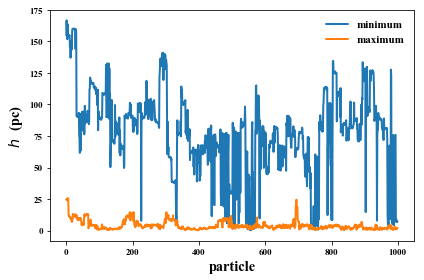

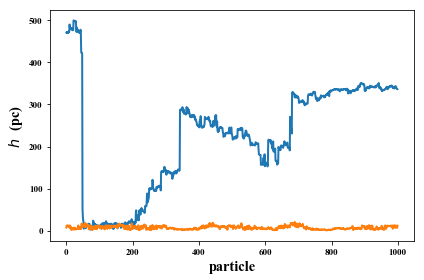

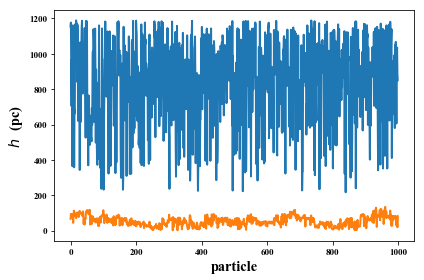

In [42]:
#smoothing plots
#CDM
plt.figure()
plt.xlabel(r'particle',size='x-large')
plt.ylabel(r'$h\ $ (pc)',size='x-large')
plt.plot(hMin,label='minimum')
plt.plot(hMax,label='maximum')
plt.legend(loc=1, prop={'size': 11})
plt.tight_layout()
plt.savefig('smooth_cdm.png')
plt.show()

#FDM21
hMin21=np.load('./21+22_data/fdm21hminSmooth.npy')
hMax21=np.load('./21+22_data/fdm21hmaxSmooth.npy')
plt.figure()
plt.xlabel(r'particle',size='x-large')
plt.ylabel(r'$h\ $ (pc)',size='x-large')
plt.plot(hMin21,label='minimum-FDM21')
plt.plot(hMax21,label='maximum-FDM21')
#plt.legend(loc=1, prop={'size': 11})
plt.tight_layout()
plt.savefig('smooth_21.png')
plt.show()

#FDM22
hMin22=np.load('./21+22_data/fdm22hminSmooth.npy')
hMax22=np.load('./21+22_data/fdm22hmaxSmooth.npy')
plt.figure()
plt.xlabel(r'particle',size='x-large')
plt.ylabel(r'$h\ $ (pc)',size='x-large')
plt.plot(hMin22,label='minimum-FDM22')
plt.plot(hMax22,label='maximum-FDM22')
#plt.legend(loc=1, prop={'size': 11})
plt.tight_layout()
plt.savefig('smooth_22.png')
plt.show()

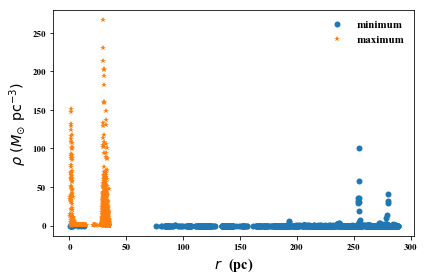

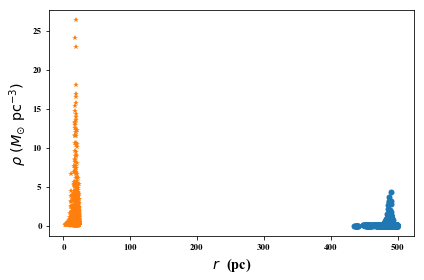

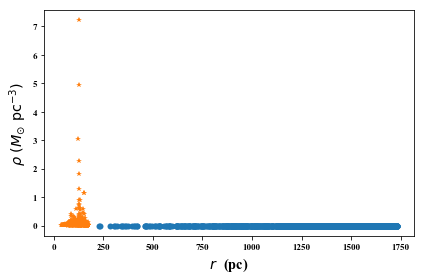

In [20]:
#rho plots
#smoothing plots
#CDM
plt.figure()
plt.xlabel(r'$r\ $ (pc)',size='x-large')
plt.ylabel(r'$\rho \ (M_{\odot} \ \mathrm{pc}^{-3})$',size='x-large')
plt.plot(radMin,rhoMin,ls=' ',marker ='o',label='minimum')
plt.plot(radMax,rhoMax,ls=' ',marker ='*',label='maximum')
plt.legend(loc=1, prop={'size': 11})
plt.tight_layout()
plt.savefig('density_cdm.png')
plt.show()

#FDM21
radMin21=np.load('./21+22_data/fdm21radMin.npy')
radMax21=np.load('./21+22_data/fdm21radMax.npy')
cutDataMin21 = np.load('./21+22_data/fdm21partMin.npy')
cutDataMax21 = np.load('./21+22_data/fdm21partMax.npy')
rhoMin21,rhoMax21 = Densities(kernel, cutDataMin21, hMin21, cutDataMax21, hMax21)
plt.figure()
plt.xlabel(r'$r\ $ (pc)',size='x-large')
plt.ylabel(r'$\rho \ (M_{\odot} \ \mathrm{pc}^{-3})$',size='x-large')
plt.plot(radMin21,rhoMin21,ls=' ',marker ='o',label='minimum-FDM21')
plt.plot(radMax21,rhoMax21,ls=' ',marker ='*',label='maximum-FDM21')
#plt.legend(loc=1, prop={'size': 11})
plt.tight_layout()
plt.savefig('density_21.png')
plt.show()

#FDM22
radMin22=np.load('./21+22_data/fdm22radMin.npy')
radMax22=np.load('./21+22_data/fdm22radMax.npy')
cutDataMin22 = np.load('./21+22_data/fdm22partMin.npy')
cutDataMax22 = np.load('./21+22_data/fdm22partMax.npy')
rhoMin22,rhoMax22 = Densities(kernel, cutDataMin22, hMin22, cutDataMax22, hMax22)
plt.figure()
plt.xlabel(r'$r\ $ (pc)',size='x-large')
plt.ylabel(r'$\rho \ (M_{\odot} \ \mathrm{pc}^{-3})$',size='x-large')
plt.plot(radMin22,rhoMin22,ls=' ',marker ='o',label='minimum-FDM22')
plt.plot(radMax22,rhoMax22,ls=' ',marker ='*',label='maximum-FDM22')
#plt.legend(loc=1, prop={'size': 11})
plt.tight_layout()
plt.savefig('density_22.png')
plt.show()

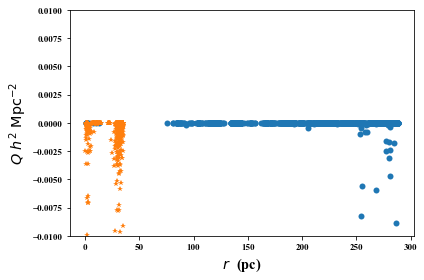

In [37]:
plt.figure()
plt.xlabel(r'$r\ $ (pc)',size='x-large')
plt.ylabel(r'$Q  \ h^{2} \ \mathrm{Mpc}^{-2}$',size='x-large')
plt.plot(radMin,Q_rhoMin*(1e12)*(1/.67**2),ls=' ',marker ='o',label='minimum-CDM')
plt.plot(radMax,Q_rhoMax*(1e12)*(1/.67**2),ls=' ',marker ='*',label='maximum-CDM')
#plt.legend(loc=1, prop={'size': 11})
plt.ylim(-1e-2,1e-2)
plt.tight_layout()
plt.savefig('qcosmo_cdm.png')
plt.show()

/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log10
  after removing the cwd from sys.path.
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: RuntimeWarning: divide by zero encountered in log10
  if __name__ == '__main__':
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: RuntimeWarning: divide by zero encountered in log10
  # Remove the CWD from sys.path while we load stuff.
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: divide by zero encountered in log10
  # This is added back by InteractiveShellApp.init_path()
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:12: RuntimeWarning: divide by zero encountered in log10
  if sys.path[0] == '':


-7.60446981871


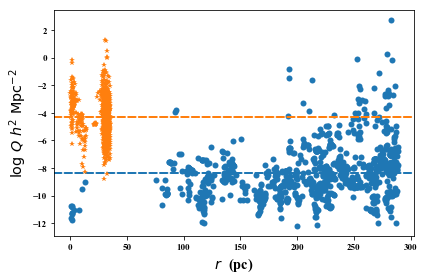

/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: divide by zero encountered in log10
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:27: RuntimeWarning: divide by zero encountered in log10
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in log10
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:29: RuntimeWarning: divide by zero encountered in log10


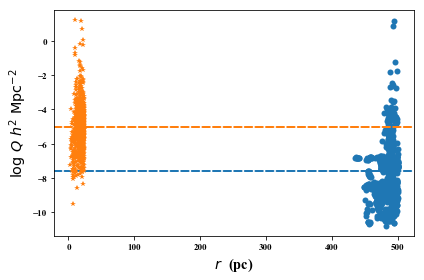

/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:42: RuntimeWarning: divide by zero encountered in log10
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in log10
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in log10
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:45: RuntimeWarning: divide by zero encountered in log10


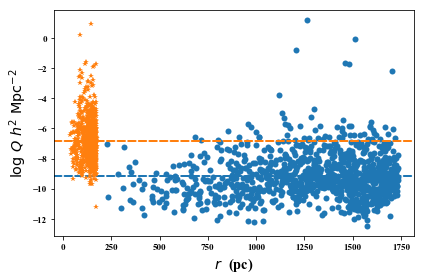

In [40]:
#rho plots
#smoothing plots
#CDM
print(np.mean(np.log10(np.abs(Q_rhoMin21*(1e12)*(1/.67**2)))[np.log10(np.abs(Q_rhoMin21*(1e12)*(1/.67**2))) > -np.inf]))

plt.figure()
plt.xlabel(r'$r\ $ (pc)',size='x-large')
plt.ylabel(r'$\log \ Q  \ h^{2} \ \mathrm{Mpc}^{-2}$',size='x-large')
plt.plot(radMin,np.log10(np.abs(Q_rhoMin*(1e12)*(1/.67**2))),ls=' ',marker ='o',label='minimum-CDM')
plt.axhline(np.mean(np.log10(np.abs(Q_rhoMin*(1e12)*(1/.67**2)))[np.log10(np.abs(Q_rhoMin*(1e12)*(1/.67**2))) > -np.inf]),c='C0',ls='--')
plt.plot(radMax,np.log10(np.abs(Q_rhoMax*(1e12)*(1/.67**2))),ls=' ',marker ='*',label='maximum-CDM')
plt.axhline(np.mean(np.log10(np.abs(Q_rhoMax*(1e12)*(1/.67**2)))[np.log10(np.abs(Q_rhoMax*(1e12)*(1/.67**2))) > -np.inf]),c='C1',ls='--')
#plt.legend(loc=1, prop={'size': 11})
plt.tight_layout()
plt.savefig('qcosmo_cdm.png')
plt.show()

#FDM21
del_rhoMin21, delsq_rhoMin21, del_rhoMax21, delsq_rhoMax21 = Gradients(del_cubic_bspline,lap_cubic_bspline,cutDataMin21,rhoMin21,\
                                                             cutDataMax21,rhoMax21,hMin21,hMax21)

Q_rhoMin21,accelQ_rhoMin21,Q_rhoMax21,accelQ_rhoMax21  = QPressure(del_cubic_bspline,parth_cubic_bspline,rhoMin21,rhoMax21,\
                                                 del_rhoMin21,del_rhoMax21,delsq_rhoMin21,delsq_rhoMax21,\
                                                 hMin21,hMax21,cutDataMin21,cutDataMax21)

plt.figure()
plt.xlabel(r'$r\ $ (pc)',size='x-large')
plt.ylabel(r'$\log \ Q  \ h^{2} \ \mathrm{Mpc}^{-2}$',size='x-large')
plt.plot(radMin21,np.log10(np.abs(Q_rhoMin21*(1e12)*(1/.67**2))),ls=' ',marker ='o',label='minimum-FDM21')
plt.axhline(np.mean(np.log10(np.abs(Q_rhoMin21*(1e12)*(1/.67**2)))[np.log10(np.abs(Q_rhoMin21*(1e12)*(1/.67**2))) > -np.inf]),c='C0',ls='--')
plt.plot(radMax21,np.log10(np.abs(Q_rhoMax21*(1e12)*(1/.67**2))),ls=' ',marker ='*',label='maximum-FDM21')
plt.axhline(np.mean(np.log10(np.abs(Q_rhoMax21*(1e12)*(1/.67**2)))[np.log10(np.abs(Q_rhoMax21*(1e12)*(1/.67**2))) > -np.inf]),c='C1',ls='--')
#plt.legend(loc=1, prop={'size': 11})
plt.tight_layout()
plt.savefig('qcosmo_21.png')
plt.show()

#FDM22
del_rhoMin22, delsq_rhoMin22, del_rhoMax22, delsq_rhoMax22 = Gradients(del_cubic_bspline,lap_cubic_bspline,cutDataMin22,rhoMin22,\
                                                             cutDataMax22,rhoMax22,hMin22,hMax22)

Q_rhoMin22,accelQ_rhoMin22,Q_rhoMax22,accelQ_rhoMax22  = QPressure(del_cubic_bspline,parth_cubic_bspline,rhoMin22,rhoMax22,\
                                                 del_rhoMin22,del_rhoMax22,delsq_rhoMin22,delsq_rhoMax22,\
                                                 hMin22,hMax22,cutDataMin22,cutDataMax22)
plt.figure()
plt.xlabel(r'$r\ $ (pc)',size='x-large')
plt.ylabel(r'$\log \ Q  \ h^{2} \ \mathrm{Mpc}^{-2}$',size='x-large')
plt.plot(radMin22,np.log10(np.abs(Q_rhoMin22*(1e12)*(1/.67**2))),ls=' ',marker ='o',label='minimum-FDM21')
plt.axhline(np.mean(np.log10(np.abs(Q_rhoMin22*(1e12)*(1/.67**2)))[np.log10(np.abs(Q_rhoMin22*(1e12)*(1/.67**2))) > -np.inf]),c='C0',ls='--')
plt.plot(radMax22,np.log10(np.abs(Q_rhoMax22*(1e12)*(1/.67**2))),ls=' ',marker ='*',label='maximum-FDM21')
plt.axhline(np.mean(np.log10(np.abs(Q_rhoMax22*(1e12)*(1/.67**2)))[np.log10(np.abs(Q_rhoMax22*(1e12)*(1/.67**2))) > -np.inf]),c='C1',ls='--')
#plt.legend(loc=1, prop={'size': 11})
plt.tight_layout()
plt.savefig('qcosmo_22.png')
plt.show()


/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in true_divide
  from ipykernel import kernelapp as app
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: divide by zero encountered in true_divide
  app.launch_new_instance()
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:16: RuntimeWarning: invalid value encountered in true_divide
  app.launch_new_instance()


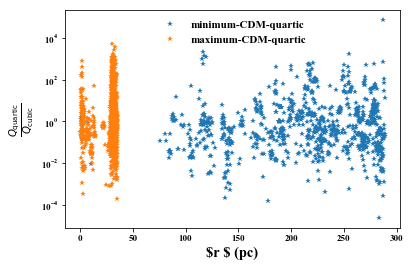

In [15]:
#kernel diff plots from default (for QP) only CDM

rhoMin1,rhoMax1 = Densities(quartic_bspline, cutDataMin, hMin, cutDataMax, hMax)
del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_quartic_bspline,lap_quartic_bspline,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

Q_rhoMin_quartic,accelQ_rhoMin1,Q_rhoMax_quartic,accelQ_rhoMax1  = QPressure(del_quartic_bspline,parth_quartic_bspline,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

plt.figure()
plt.xlabel(r'$r\ $ (pc)',size='x-large')
plt.ylabel(r'$\frac{Q_{\mathrm{quartic}}}{Q_{\mathrm{cubic}}} \ $',size='x-large')
#plt.semilogy(radMin,np.abs(Q_rhoMin)*(1e12)*(1/.67**2) ,ls=' ',marker ='o',label='minimum-CDM')
#plt.semilogy(radMax,np.abs(Q_rhoMax)*(1e12)*(1/.67**2) ,ls=' ',marker ='o',label='maximum-CDM')
#plt.semilogy(radMin,np.abs(Q_rhoMin1)*(1e12)*(1/.67**2),ls=' ',marker ='*',label='minimum-CDM-quartic')
#plt.semilogy(radMax,np.abs(Q_rhoMax1)*(1e12)*(1/.67**2),ls=' ',marker ='*',label='maximum-CDM-quartic')
plt.semilogy(radMin,np.abs(Q_rhoMin_quartic/Q_rhoMin),ls=' ',marker ='*',label='minimum-CDM-quartic')
plt.semilogy(radMax,np.abs(Q_rhoMax_quartic/Q_rhoMax),ls=' ',marker ='*',label='maximum-CDM-quartic')
plt.legend( prop={'size': 11})
plt.tight_layout()
plt.savefig('quartic_div.png',clobber=True)
plt.show()

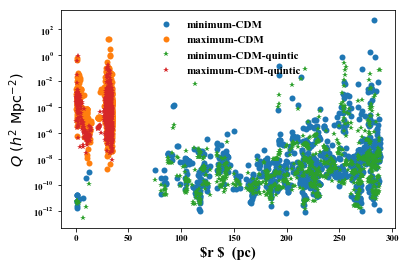

In [16]:
rhoMin1,rhoMax1 = Densities(quintic_bspline, cutDataMin, hMin, cutDataMax, hMax)
del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_quintic_bspline,lap_quintic_bspline,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

Q_rhoMin_quintic,accelQ_rhoMin1,Q_rhoMax_quintic,accelQ_rhoMax1  = QPressure(del_quintic_bspline,parth_quintic_bspline,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

plt.figure()
plt.xlabel(r'$r \ $  (pc)',size='x-large')
plt.ylabel(r'$Q \ (h^{2} \ \mathrm{Mpc}^{-2})$',size='x-large')
plt.semilogy(radMin,np.abs(Q_rhoMin)*(1e12)*(1/.67**2) ,ls=' ',marker ='o',label='minimum-CDM')
plt.semilogy(radMax,np.abs(Q_rhoMax)*(1e12)*(1/.67**2) ,ls=' ',marker ='o',label='maximum-CDM')
plt.semilogy(radMin,np.abs(Q_rhoMin_quintic)*(1e12)*(1/.67**2),ls=' ',marker ='*',label='minimum-CDM-quintic')
plt.semilogy(radMax,np.abs(Q_rhoMax_quintic)*(1e12)*(1/.67**2),ls=' ',marker ='*',label='maximum-CDM-quintic')
plt.legend( prop={'size': 11})
plt.tight_layout()
plt.savefig('quintic_comp.png',clobber=True)
plt.show()

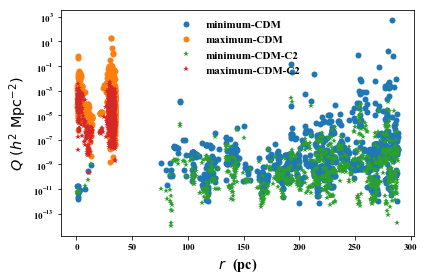

In [71]:
rhoMin1,rhoMax1 = Densities(wend_C2, cutDataMin, hMin, cutDataMax, hMax)
del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_wend_C2,lap_wend_C2,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

Q_rhoMin_C2,accelQ_rhoMin1,Q_rhoMax_C2,accelQ_rhoMax1  = QPressure(del_wend_C2,parth_wend_C2,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

plt.figure()
plt.xlabel(r'$r\ $ (pc)',size='x-large')
plt.ylabel(r'$Q \ (h^{2} \ \mathrm{Mpc}^{-2})$',size='x-large')
plt.semilogy(radMin,np.abs(Q_rhoMin)*(1e12)*(1/.67**2) ,ls=' ',marker ='o',label='minimum-CDM')
plt.semilogy(radMax,np.abs(Q_rhoMax)*(1e12)*(1/.67**2) ,ls=' ',marker ='o',label='maximum-CDM')
plt.semilogy(radMin,np.abs(Q_rhoMin_C2)*(1e12)*(1/.67**2),ls=' ',marker ='*',label='minimum-CDM-C2')
plt.semilogy(radMax,np.abs(Q_rhoMax_C2)*(1e12)*(1/.67**2),ls=' ',marker ='*',label='maximum-CDM-C2')
plt.legend( prop={'size': 11})
plt.tight_layout()
plt.savefig('C2_comp.png',clobber=True)
plt.show()

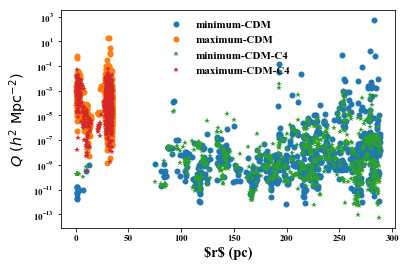

In [18]:
rhoMin1,rhoMax1 = Densities(wend_C4, cutDataMin, hMin, cutDataMax, hMax)
del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_wend_C4,lap_wend_C4,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

Q_rhoMin_C4,accelQ_rhoMin1,Q_rhoMax_C4,accelQ_rhoMax1  = QPressure(del_wend_C4,parth_wend_C4,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

plt.figure()
plt.xlabel(r'$r\ $ (pc)',size='x-large')
plt.ylabel(r'$Q \ (h^{2} \ \mathrm{Mpc}^{-2})$',size='x-large')
plt.semilogy(radMin,np.abs(Q_rhoMin)*(1e12)*(1/.67**2) ,ls=' ',marker ='o',label='minimum-CDM')
plt.semilogy(radMax,np.abs(Q_rhoMax)*(1e12)*(1/.67**2) ,ls=' ',marker ='o',label='maximum-CDM')
plt.semilogy(radMin,np.abs(Q_rhoMin_C4)*(1e12)*(1/.67**2),ls=' ',marker ='*',label='minimum-CDM-C4')
plt.semilogy(radMax,np.abs(Q_rhoMax_C4)*(1e12)*(1/.67**2),ls=' ',marker ='*',label='maximum-CDM-C4')
plt.legend( prop={'size': 11})
plt.tight_layout()
plt.savefig('C4_comp.png',clobber=True)
plt.show()

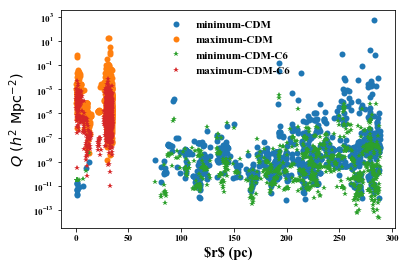

In [19]:
rhoMin1,rhoMax1 = Densities(wend_C6, cutDataMin, hMin, cutDataMax, hMax)
del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_wend_C6,lap_wend_C6,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

Q_rhoMin_C6,accelQ_rhoMin1,Q_rhoMax_C6,accelQ_rhoMax1  = QPressure(del_wend_C6,parth_wend_C6,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

plt.figure()
plt.xlabel(r'$r \ $ (pc)',size='x-large')
plt.ylabel(r'$Q \ (h^{2} \ \mathrm{Mpc}^{-2})$',size='x-large')
plt.semilogy(radMin,np.abs(Q_rhoMin)*(1e12)*(1/.67**2) ,ls=' ',marker ='o',label='minimum-CDM')
plt.semilogy(radMax,np.abs(Q_rhoMax)*(1e12)*(1/.67**2) ,ls=' ',marker ='o',label='maximum-CDM')
plt.semilogy(radMin,np.abs(Q_rhoMin_C6)*(1e12)*(1/.67**2),ls=' ',marker ='*',label='minimum-CDM-C6')
plt.semilogy(radMax,np.abs(Q_rhoMax_C6)*(1e12)*(1/.67**2),ls=' ',marker ='*',label='maximum-CDM-C6')
plt.legend( prop={'size': 11})
plt.tight_layout()
plt.savefig('C6_comp.png',clobber=True)
plt.show()

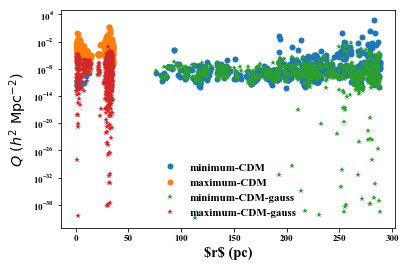

In [20]:
rhoMin1,rhoMax1 = Densities(gaussian, cutDataMin, hMin, cutDataMax, hMax)
del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_gaussian,lap_gaussian,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

Q_rhoMin_gauss,accelQ_rhoMin1,Q_rhoMax_gauss,accelQ_rhoMax1  = QPressure(del_gaussian,parth_gaussian,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

plt.figure()
plt.xlabel(r'$r \ $ (pc)',size='x-large')
plt.ylabel(r'$Q \ (h^{2} \ \mathrm{Mpc}^{-2})$',size='x-large')
plt.semilogy(radMin,np.abs(Q_rhoMin)*(1e12)*(1/.67**2) ,ls=' ',marker ='o',label='minimum-CDM')
plt.semilogy(radMax,np.abs(Q_rhoMax)*(1e12)*(1/.67**2) ,ls=' ',marker ='o',label='maximum-CDM')
plt.semilogy(radMin,np.abs(Q_rhoMin_gauss)*(1e12)*(1/.67**2),ls=' ',marker ='*',label='minimum-CDM-gauss')
plt.semilogy(radMax,np.abs(Q_rhoMax_gauss)*(1e12)*(1/.67**2),ls=' ',marker ='*',label='maximum-CDM-gauss')
plt.legend( prop={'size': 11})
plt.tight_layout()
plt.savefig('gauss_comp.png',clobber=True)
plt.show()

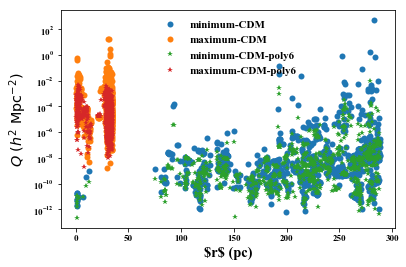

In [21]:
rhoMin1,rhoMax1 = Densities(poly6, cutDataMin, hMin, cutDataMax, hMax)
del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_poly6,lap_poly6,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

Q_rhoMin_poly6,accelQ_rhoMin1,Q_rhoMax_poly6,accelQ_rhoMax1  = QPressure(del_poly6,parth_poly6,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

plt.figure()
plt.xlabel(r'$r \ $ (pc)',size='x-large')
plt.ylabel(r'$Q \ (h^{2} \ \mathrm{Mpc}^{-2})$',size='x-large')
plt.semilogy(radMin,np.abs(Q_rhoMin)*(1e12)*(1/.67**2) ,ls=' ',marker ='o',label='minimum-CDM')
plt.semilogy(radMax,np.abs(Q_rhoMax)*(1e12)*(1/.67**2) ,ls=' ',marker ='o',label='maximum-CDM')
plt.semilogy(radMin,np.abs(Q_rhoMin_poly6)*(1e12)*(1/.67**2),ls=' ',marker ='*',label='minimum-CDM-poly6')
plt.semilogy(radMax,np.abs(Q_rhoMax_poly6)*(1e12)*(1/.67**2),ls=' ',marker ='*',label='maximum-CDM-poly6')
plt.legend( prop={'size': 11})
plt.tight_layout()
plt.savefig('poly6_comp.png',clobber=True)
plt.show()

/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: divide by zero encountered in true_divide
  """
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in true_divide
  
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in true_divide
  
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: divide by zero encountered in true_divide
  import sys
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in true_divide
  import sys
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: divide 

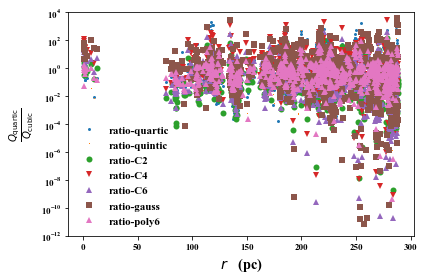

/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: invalid value encountered in true_divide
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:23: RuntimeWarning: invalid value encountered in true_divide
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:24: RuntimeWarning: invalid value encountered in true_divide
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:25: RuntimeWarning: invalid value encountered in true_divide
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide
/Use

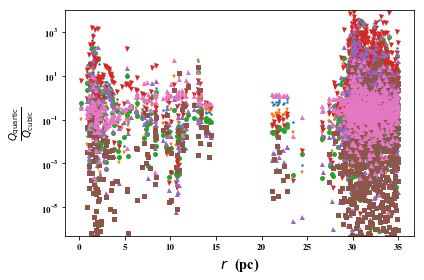

In [64]:
#all min div by bspline
plt.figure()
plt.xlabel(r'$r\ $  (pc)',size='x-large')
plt.ylabel(r'$\frac{Q_{\mathrm{quartic}}}{Q_{\mathrm{cubic}}} \ $',size='x-large')
plt.semilogy(radMin,np.abs(Q_rhoMin_quartic/Q_rhoMin),ls=' ',marker ='.',label='ratio-quartic')
plt.semilogy(radMin,np.abs(Q_rhoMin_quintic/Q_rhoMin),ls=' ',marker =',',label='ratio-quintic')
plt.semilogy(radMin,np.abs(Q_rhoMin_C2/Q_rhoMin),ls=' ',marker ='o',label='ratio-C2')
plt.semilogy(radMin,np.abs(Q_rhoMin_C4/Q_rhoMin),ls=' ',marker ='v',label='ratio-C4')
plt.semilogy(radMin,np.abs(Q_rhoMin_C6/Q_rhoMin),ls=' ',marker ='^',label='ratio-C6')
plt.semilogy(radMin,np.abs(Q_rhoMin_gauss/Q_rhoMin),ls=' ',marker ='s',label='ratio-gauss')
plt.semilogy(radMin,np.abs(Q_rhoMin_poly6/Q_rhoMin),ls=' ',marker ='^',label='ratio-poly6')
plt.legend( prop={'size': 11})
plt.ylim(1e-12,1e4)
plt.tight_layout()
plt.savefig('all_min_div.png',clobber=True)
plt.show()

#all max div by bspline
plt.figure()
plt.xlabel(r'$r \ $ (pc)',size='x-large')
plt.ylabel(r'$\frac{Q_{\mathrm{quartic}}}{Q_{\mathrm{cubic}}} \ $',size='x-large')
plt.semilogy(radMax,np.abs(Q_rhoMax_quartic/Q_rhoMax),ls=' ',marker ='.',markersize = 5,label='ratio-quartic')
plt.semilogy(radMax,np.abs(Q_rhoMax_quintic/Q_rhoMax),ls=' ',marker ='*',markersize = 5,label='ratio-quintic')
plt.semilogy(radMax,np.abs(Q_rhoMax_C2/Q_rhoMax),ls=' ',marker ='o',markersize = 5,label='ratio-C2')
plt.semilogy(radMax,np.abs(Q_rhoMax_C4/Q_rhoMax),ls=' ',marker ='v',markersize = 5,label='ratio-C4')
plt.semilogy(radMax,np.abs(Q_rhoMax_C6/Q_rhoMax),ls=' ',marker ='^',markersize = 5,label='ratio-C6')
plt.semilogy(radMax,np.abs(Q_rhoMax_gauss/Q_rhoMax),ls=' ',marker ='s',markersize = 5,label='ratio-gauss')
plt.semilogy(radMax,np.abs(Q_rhoMax_poly6/Q_rhoMax),ls=' ',marker ='^',markersize = 5,label='ratio-poly6')
#plt.legend( prop={'size': 11})
plt.ylim(5e-7,1e4)
plt.tight_layout()
plt.savefig('all_max_div.png',clobber=True)
plt.show()

In [48]:
#spreads in log
#min
print(np.std(np.log10(np.abs(Q_rhoMin_quartic/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_quartic/Q_rhoMin))<inf]))
print(np.std(np.log10(np.abs(Q_rhoMin_quintic/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_quintic/Q_rhoMin))<inf]))
print(np.std(np.log10(np.abs(Q_rhoMin_C2/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_C2/Q_rhoMin))<inf]))
print(np.std(np.log10(np.abs(Q_rhoMin_C4/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_C4/Q_rhoMin))<inf]))
print(np.std(np.log10(np.abs(Q_rhoMin_C6/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_C6/Q_rhoMin))<inf]))
print(np.std(np.log10(np.abs(Q_rhoMin_gauss/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_gauss/Q_rhoMin))<inf]))
print(np.std(np.log10(np.abs(Q_rhoMin_poly6/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_poly6/Q_rhoMin))<inf]))

#max
print(np.std(np.log10(np.abs(Q_rhoMax_quartic/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_quartic/Q_rhoMax))<inf]))
print(np.std(np.log10(np.abs(Q_rhoMax_quintic/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_quintic/Q_rhoMax))<inf]))
print(np.std(np.log10(np.abs(Q_rhoMax_C2/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_C2/Q_rhoMax))<inf]))
print(np.std(np.log10(np.abs(Q_rhoMax_C4/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_C4/Q_rhoMax))<inf]))
print(np.std(np.log10(np.abs(Q_rhoMax_C6/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_C6/Q_rhoMax))<inf]))
print(np.std(np.log10(np.abs(Q_rhoMax_gauss/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_gauss/Q_rhoMax))<inf]))
print(np.std(np.log10(np.abs(Q_rhoMax_poly6/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_poly6/Q_rhoMax))<inf]))


1.19265308888
0.989811122066
1.21624398278
1.47647144048
1.60393632759
4.01719216975
0.872228107356
1.23303628146
1.27361538067
1.50264976094
1.6936967238
1.82198504174
4.62140230738
0.895111149954


/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removi

In [54]:
#means in log
#min
print(np.mean(np.log10(np.abs(Q_rhoMin_quartic/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_quartic/Q_rhoMin))<inf]))
print(np.mean(np.log10(np.abs(Q_rhoMin_quintic/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_quintic/Q_rhoMin))<inf]))
print(np.mean(np.log10(np.abs(Q_rhoMin_C2/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_C2/Q_rhoMin))<inf]))
print(np.mean(np.log10(np.abs(Q_rhoMin_C4/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_C4/Q_rhoMin))<inf]))
print(np.mean(np.log10(np.abs(Q_rhoMin_C6/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_C6/Q_rhoMin))<inf]))
print(np.mean(np.log10(np.abs(Q_rhoMin_gauss/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_gauss/Q_rhoMin))<inf]))
print(np.mean(np.log10(np.abs(Q_rhoMin_poly6/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_poly6/Q_rhoMin))<inf]))

#max
print(np.mean(np.log10(np.abs(Q_rhoMax_quartic/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_quartic/Q_rhoMax))<inf]))
print(np.mean(np.log10(np.abs(Q_rhoMax_quintic/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_quintic/Q_rhoMax))<inf]))
print(np.mean(np.log10(np.abs(Q_rhoMax_C2/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_C2/Q_rhoMax))<inf]))
print(np.mean(np.log10(np.abs(Q_rhoMax_C4/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_C4/Q_rhoMax))<inf]))
print(np.mean(np.log10(np.abs(Q_rhoMax_C6/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_C6/Q_rhoMax))<inf]))
print(np.mean(np.log10(np.abs(Q_rhoMax_gauss/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_gauss/Q_rhoMax))<inf]))
print(np.mean(np.log10(np.abs(Q_rhoMax_poly6/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_poly6/Q_rhoMax))<inf]))


-0.29923153592
-0.426113365766
-1.1298956994
-0.200070281247
-1.03788341125
-1.0649610759
-0.446576589875
0.132153446394
-0.160335283365
-0.572564415715
0.344539590895
-0.732773692983
-4.41817975832
-0.60602566455


/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removi

In [72]:
#means in log
#min
print(np.median(np.log10(np.abs(Q_rhoMin_quartic/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_quartic/Q_rhoMin))<inf]))
print(np.median(np.log10(np.abs(Q_rhoMin_quintic/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_quintic/Q_rhoMin))<inf]))
print(np.median(np.log10(np.abs(Q_rhoMin_C2/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_C2/Q_rhoMin))<inf]))
print(np.median(np.log10(np.abs(Q_rhoMin_C4/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_C4/Q_rhoMin))<inf]))
print(np.median(np.log10(np.abs(Q_rhoMin_C6/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_C6/Q_rhoMin))<inf]))
print(np.median(np.log10(np.abs(Q_rhoMin_gauss/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_gauss/Q_rhoMin))<inf]))
print(np.median(np.log10(np.abs(Q_rhoMin_poly6/Q_rhoMin))[np.log10(np.abs(Q_rhoMin_poly6/Q_rhoMin))<inf]))

#max
print(np.median(np.log10(np.abs(Q_rhoMax_quartic/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_quartic/Q_rhoMax))<inf]))
print(np.median(np.log10(np.abs(Q_rhoMax_quintic/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_quintic/Q_rhoMax))<inf]))
print(np.median(np.log10(np.abs(Q_rhoMax_C2/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_C2/Q_rhoMax))<inf]))
print(np.median(np.log10(np.abs(Q_rhoMax_C4/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_C4/Q_rhoMax))<inf]))
print(np.median(np.log10(np.abs(Q_rhoMax_C6/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_C6/Q_rhoMax))<inf]))
print(np.median(np.log10(np.abs(Q_rhoMax_gauss/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_gauss/Q_rhoMax))<inf]))
print(np.median(np.log10(np.abs(Q_rhoMax_poly6/Q_rhoMax))[np.log10(np.abs(Q_rhoMax_poly6/Q_rhoMax))<inf]))


-0.398111127096
-0.50190144618
-1.09690378642
-0.128181074343
-0.919692473592
-0.334508432705
-0.365575265779
0.0614332951378
-0.183086844709
-0.536080004907
0.468064734484
-0.611561403631
-3.16148883392
-0.54462347608


/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in less
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/Users/jamiesullivan/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removi

In [63]:
#cubic time
%timeit -n 2 rhoMin1,rhoMax1 = Densities(cubic_bspline, cutDataMin, hMin, cutDataMax, hMax)
%timeit -n 2 del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_cubic_bspline,lap_cubic_bspline,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

%timeit -n 2 Q_rhoMin_cubic,accelQ_rhoMin1,Q_rhoMax_cubic,accelQ_rhoMax1  = QPressure(del_cubic_bspline,parth_cubic_bspline,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

2 loops, best of 3: 13.1 s per loop
2 loops, best of 3: 34.6 s per loop
2 loops, best of 3: 32.5 s per loop


In [56]:
#quartic time
%timeit -n 2 rhoMin1,rhoMax1 = Densities(quartic_bspline, cutDataMin, hMin, cutDataMax, hMax)
%timeit -n 2 del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_quartic_bspline,lap_quartic_bspline,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

%timeit -n 2 Q_rhoMin_quartic,accelQ_rhoMin1,Q_rhoMax_quartic,accelQ_rhoMax1  = QPressure(del_quartic_bspline,parth_quartic_bspline,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

2 loops, best of 3: 11.9 s per loop
2 loops, best of 3: 35.1 s per loop
2 loops, best of 3: 30.6 s per loop


In [57]:
#quintic time
%timeit -n 2 rhoMin1,rhoMax1 = Densities(quintic_bspline, cutDataMin, hMin, cutDataMax, hMax)
%timeit -n 2 del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_quintic_bspline,lap_quintic_bspline,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

%timeit -n 2 Q_rhoMin_quintic,accelQ_rhoMin1,Q_rhoMax_quintic,accelQ_rhoMax1  = QPressure(del_quintic_bspline,parth_quintic_bspline,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

2 loops, best of 3: 11.6 s per loop
2 loops, best of 3: 33.3 s per loop
2 loops, best of 3: 31.9 s per loop


In [58]:
#C2 time
%timeit -n 2 rhoMin1,rhoMax1 = Densities(wend_C2, cutDataMin, hMin, cutDataMax, hMax)
%timeit -n 2 del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_wend_C2,lap_wend_C2,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

%timeit -n 2 Q_rhoMin_C2,accelQ_rhoMin1,Q_rhoMax_C2,accelQ_rhoMax1  = QPressure(del_wend_C2,parth_wend_C2,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

2 loops, best of 3: 10.8 s per loop
2 loops, best of 3: 31.9 s per loop
2 loops, best of 3: 29.2 s per loop


In [59]:
#C4 time
%timeit -n 2 rhoMin1,rhoMax1 = Densities(wend_C4, cutDataMin, hMin, cutDataMax, hMax)
%timeit -n 2 del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_wend_C4,lap_wend_C4,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

%timeit -n 2 Q_rhoMin_C4,accelQ_rhoMin1,Q_rhoMax_C4,accelQ_rhoMax1  = QPressure(del_wend_C4,parth_wend_C4,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

2 loops, best of 3: 10.9 s per loop
2 loops, best of 3: 34.7 s per loop
2 loops, best of 3: 31 s per loop


In [60]:
#C6 time
%timeit -n 2 rhoMin1,rhoMax1 = Densities(wend_C6, cutDataMin, hMin, cutDataMax, hMax)
%timeit -n 2 del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_wend_C6,lap_wend_C6,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

%timeit -n 2 Q_rhoMin_C6,accelQ_rhoMin1,Q_rhoMax_C6,accelQ_rhoMax1  = QPressure(del_wend_C6,parth_wend_C6,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

2 loops, best of 3: 11.3 s per loop
2 loops, best of 3: 36.8 s per loop
2 loops, best of 3: 29.8 s per loop


In [61]:
#gauss time
%timeit -n 2 rhoMin1,rhoMax1 = Densities(gaussian, cutDataMin, hMin, cutDataMax, hMax)
%timeit -n 2 del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_gaussian,lap_gaussian,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

%timeit -n 2 Q_rhoMin_gauss,accelQ_rhoMin1,Q_rhoMax_gauss,accelQ_rhoMax1  = QPressure(del_gaussian,parth_gaussian,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

2 loops, best of 3: 21.2 s per loop
2 loops, best of 3: 56.2 s per loop
2 loops, best of 3: 50.4 s per loop


In [62]:
#poly6 time
%timeit -n 2 rhoMin1,rhoMax1 = Densities(poly6, cutDataMin, hMin, cutDataMax, hMax)
%timeit -n 2 del_rhoMin1, delsq_rhoMin1, del_rhoMax1, delsq_rhoMax1 = Gradients(del_poly6,lap_poly6,cutDataMin,rhoMin1,\
                                                             cutDataMax,rhoMax1,hMin,hMax)

%timeit -n 2 Q_rhoMin_poly6,accelQ_rhoMin1,Q_rhoMax_poly6,accelQ_rhoMax1  = QPressure(del_poly6,parth_poly6,rhoMin1,rhoMax1,\
                                                 del_rhoMin1,del_rhoMax1,delsq_rhoMin1,delsq_rhoMax1,\
                                                 hMin,hMax,cutDataMin,cutDataMax)

2 loops, best of 3: 11.4 s per loop
2 loops, best of 3: 34 s per loop
2 loops, best of 3: 33.1 s per loop


In [ ]:
#kernel times (above - non avgd)
%timeit -n 5

In [ ]:
#laplacian diff plots from default (for QP)

In [ ]:
#laplacian time vs naive